In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.io as pio

Data Analysis and Visualization

    This section will investigate and visualize the data for reaching our goals. 

In [21]:
# Load the dataset
df = pd.read_csv(r'C:\Users\nesat\OneDrive\Masaüstü\Domestic_Loan_in_Denmark\redi_project.csv')

df

,Loan Maturity,Currency,Type of Loans,Sector,Year_Month,value,Year,Month
0,Up to and including 1 year,DKK,- Revolving loans and overdrafts,Non-financial corporations,2019M01,110048.1,2019,1
1,Up to and including 1 year,DKK,- Revolving loans and overdrafts,Financial corporations,2019M01,39149.0,2019,1
2,Up to and including 1 year,DKK,- Revolving loans and overdrafts,General government,2019M01,21966.6,2019,1
3,Up to and including 1 year,DKK,- Revolving loans and overdrafts,Households,2019M01,30769.9,2019,1
4,Up to and including 1 year,DKK,- Revolving loans and overdrafts,Non-profit institutions serving households,2019M01,1043.3,2019,1
...,...,...,...,...,...,...,...,...
9595,Over 5 years,Foreign currency in total,- Other loans,Non-financial corporations,2023M12,11612.5,2023,12
9596,Over 5 years,Foreign currency in total,- Other loans,Financial corporations,2023M12,2117.1,2023,12
9597,Over 5 years,Foreign currency in total,- Other loans,General government,2023M12,0.0,2023,12
9598,Over 5 years,Foreign currency in total,- Other loans,Households,2023M12,1369.2,2023,12



1. How did households loans from the local banks in Denmark changed before and after COVID?

C:\Users\nesat\AppData\Local\Temp\ipykernel_5248\491906872.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  households_df['Year_Month'] = pd.to_datetime(households_df['Year_Month'].str.replace('M', ''), format='%Y%m')


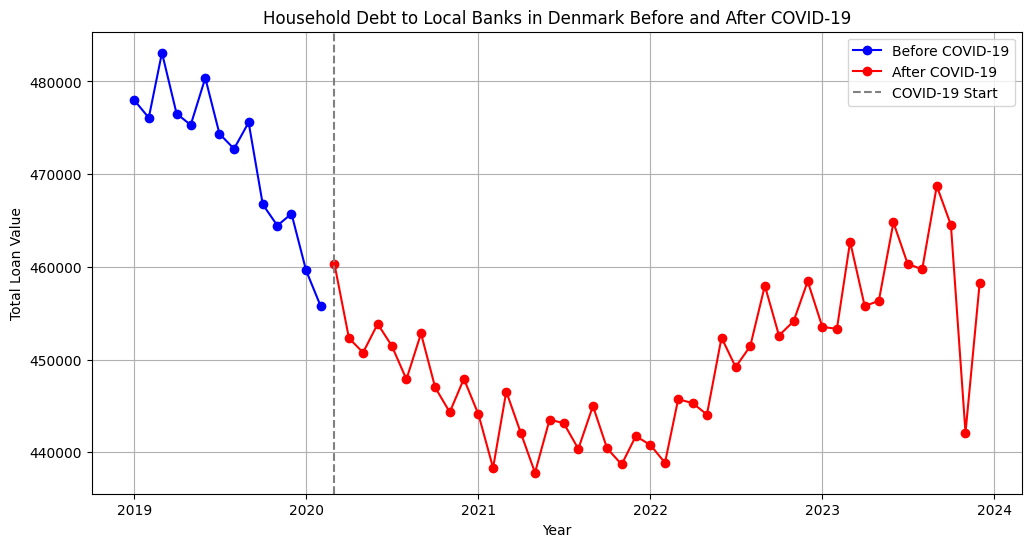

In [22]:
# Filter the data to include only households
households_df = df[df['Sector'] == 'Households']

# Correct the 'Year_Month' format by removing the "M" and converting to datetime
households_df['Year_Month'] = pd.to_datetime(households_df['Year_Month'].str.replace('M', ''), format='%Y%m')

# Split the data into before and after March 2020
before_covid = households_df[households_df['Year_Month'] < '2020-03-01']
after_covid = households_df[households_df['Year_Month'] >= '2020-03-01']

# Aggregate the loan values by month
before_covid_trend = before_covid.groupby('Year_Month')['value'].sum()
after_covid_trend = after_covid.groupby('Year_Month')['value'].sum()

# Plotting the loan values for households before and after COVID-19
plt.figure(figsize=(12, 6))
plt.plot(before_covid_trend.index, before_covid_trend.values, label='Before COVID-19', marker='o', color='blue')
plt.plot(after_covid_trend.index, after_covid_trend.values, label='After COVID-19', marker='o', color='red')
plt.axvline(pd.to_datetime('2020-03-01'), color='gray', linestyle='--', label='COVID-19 Start')
plt.title('Household Debt to Local Banks in Denmark Before and After COVID-19')
plt.xlabel('Year')
plt.ylabel('Total Loan Value')
plt.legend()
plt.grid(True)
plt.show()


2. Are there any sectors with significantly higher or lower loan values?


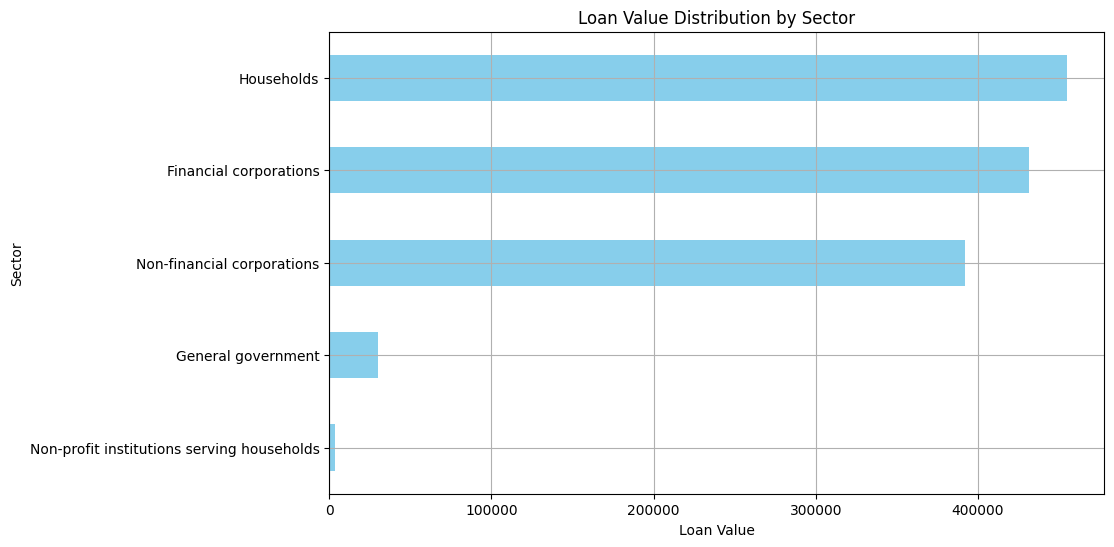

In [23]:
# Aggregating data for the visualizations
sector_loan_value = df.groupby('Sector')['value'].sum().apply(lambda x: x / 60).sort_values()

# Plotting Loan Value Distribution by Sector
plt.figure(figsize=(10, 6))
sector_loan_value.plot(kind='barh', color='skyblue')

plt.title('Loan Value Distribution by Sector')
plt.xlabel('Loan Value')
plt.ylabel('Sector')
plt.grid(True)
plt.show()


3. What was the changes in the outstanding loans in specific sector over the past 5 years?

In [24]:
# Group by year, sector, and value

grouped = df.groupby(['Year', 'Sector']).agg({'value': lambda x: x.sum() / 60}).reset_index()


a= grouped.loc[grouped['Sector'].isin(['Financial corporations', 'Households', 'Non-financial corporations' ]), ('Year','Sector', 'value')]
a

,Year,Sector,value
0,2019,Financial corporations,81668.235000
2,2019,Households,94816.681667
3,2019,Non-financial corporations,71811.981667
5,2020,Financial corporations,84683.880000
7,2020,Households,90400.506667
8,2020,Non-financial corporations,70600.001667
10,2021,Financial corporations,85587.901667
12,2021,Households,88360.523333
13,2021,Non-financial corporations,71270.148333
15,2022,Financial corporations,91186.590000


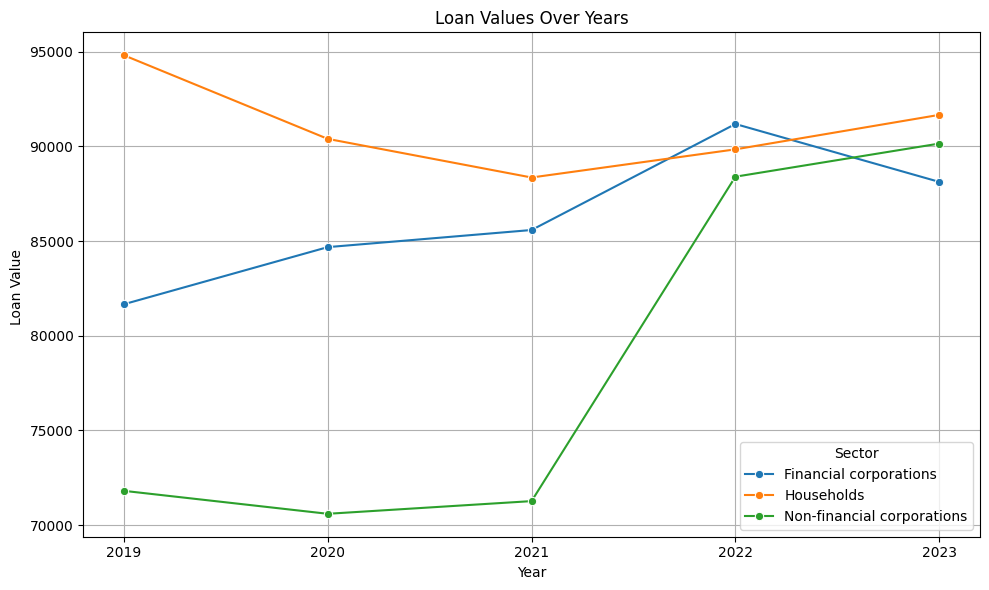

In [25]:
#Convert Year to categorical
a['Year'] = a['Year'].astype('str')

#Create a lineplot
plt.figure(figsize=(10,6))
sns.lineplot(data=a, x='Year', y='value', hue='Sector', marker='o')

#Customize the plot
plt.title('Loan Values Over Years')
plt.xlabel('Year')
plt.ylabel('Loan Value ')
plt.grid(True)

#Show the plot
plt.tight_layout()
plt.show()

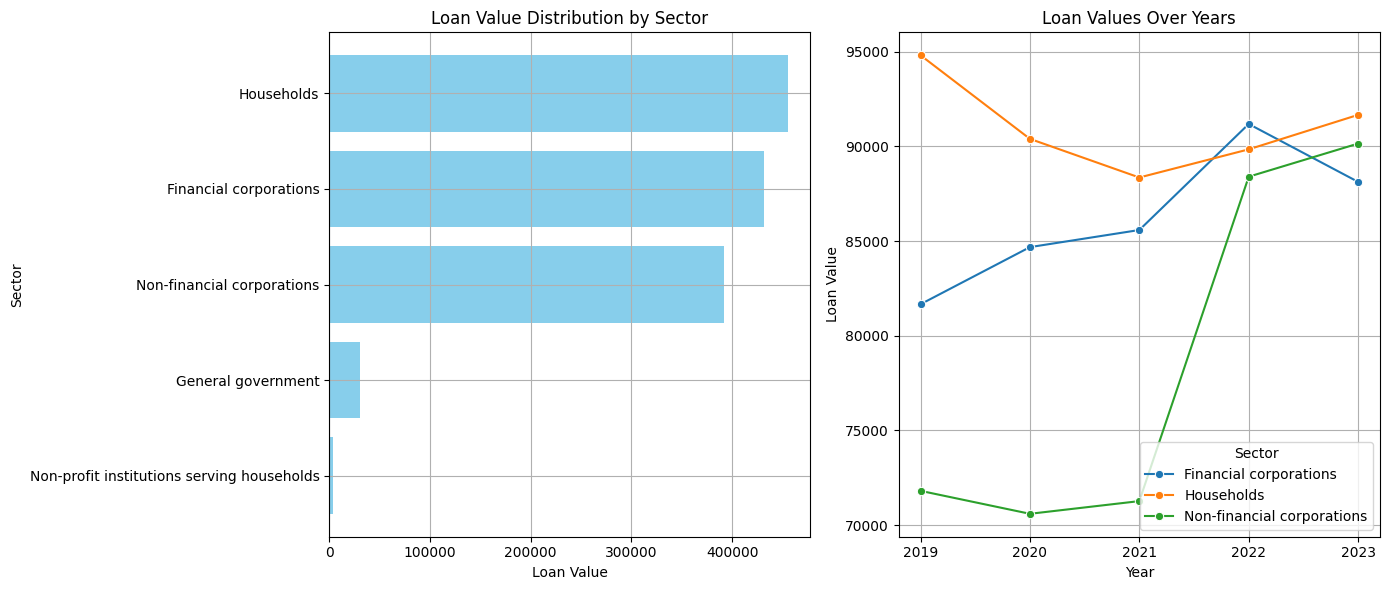

In [26]:

# Aggregating data for the visualizations
sector_loan_value = df.groupby('Sector')['value'].sum().apply(lambda x: x / 60).sort_values()

# Creating subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotting Loan Value Distribution by Sector (Barh)
axs[0].barh(sector_loan_value.index, sector_loan_value.values, color='skyblue')
axs[0].set_title('Loan Value Distribution by Sector')
axs[0].set_xlabel('Loan Value')
axs[0].set_ylabel('Sector')
axs[0].grid(True)

# Convert Year to categorical (assuming this step is needed for the line plot)
a['Year'] = a['Year'].astype('str')

# Plotting Loan Values Over Years (Lineplot)
sns.lineplot(ax=axs[1], data=a, x='Year', y='value', hue='Sector', marker='o')
axs[1].set_title('Loan Values Over Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Loan Value')
axs[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


4. Are there any noticeable trends or patterns in loan values across different months?


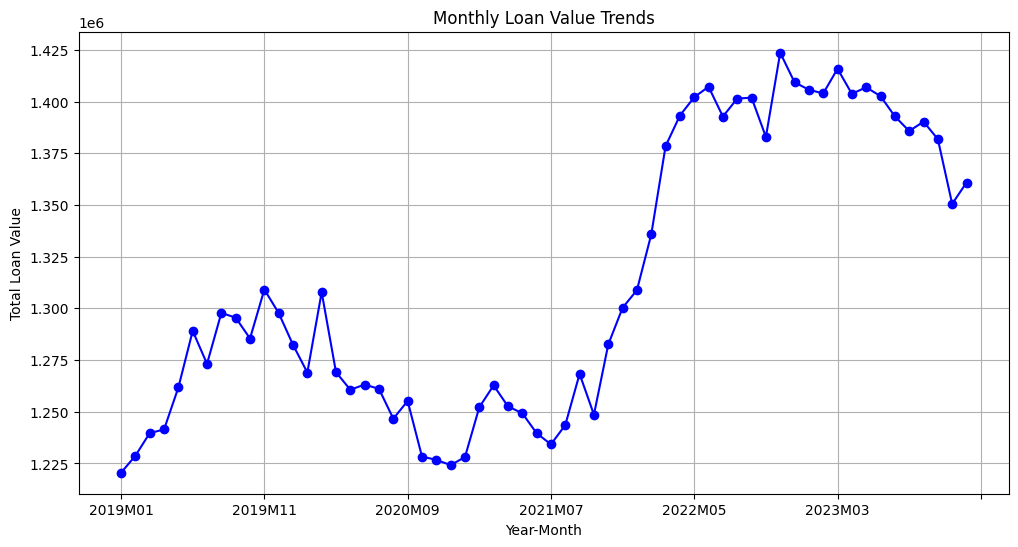

In [27]:
# Aggregating data for the visualizations
monthly_trend = df.groupby('Year_Month')['value'].sum()

# Plotting Monthly Loan Value Trends
plt.figure(figsize=(12, 6))
monthly_trend.plot(kind='line', marker='o', color='b')
plt.title('Monthly Loan Value Trends')
plt.xlabel('Year-Month')
plt.ylabel('Total Loan Value')
plt.grid(True)
plt.show()

In [28]:
interest_rates = pd.read_excel(r'C:\Users\nesat\OneDrive\Masaüstü\Domestic_Loan_in_Denmark\interest_rate.xlsx')
interest_rates.dtypes

Date              object
Interest_Rate    float64
dtype: object

Is there any correlation between household loan and interest rate?

In [29]:
interest_rates = pd.read_excel(r'C:\Users\nesat\OneDrive\Masaüstü\Domestic_Loan_in_Denmark\interest_rate.xlsx')
interest_rates['Date'] = pd.to_datetime(interest_rates['Date'].str.replace('M', '-'), format='%Y-%m')

# Filter data for households
household_loans = df[df['Sector'] == 'Households']

# Convert Year_Month to datetime for merging
household_loans['Year_Month'] = pd.to_datetime(household_loans['Year_Month'].str.replace('M', '-'), format='%Y-%m')

# Aggregate household loan values by month
monthly_loans = household_loans.groupby('Year_Month')['value'].sum().reset_index()

# Rename columns for clarity
monthly_loans.columns = ['Date', 'Household_Loan_Value']

# Merge the dataframes on Date
merged_data = pd.merge(monthly_loans, interest_rates, on='Date', how='inner')

# Calculate the correlation using pandas
correlation = merged_data['Household_Loan_Value'].corr(merged_data['Interest_Rate'])



C:\Users\nesat\AppData\Local\Temp\ipykernel_5248\2903720457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  household_loans['Year_Month'] = pd.to_datetime(household_loans['Year_Month'].str.replace('M', '-'), format='%Y-%m')


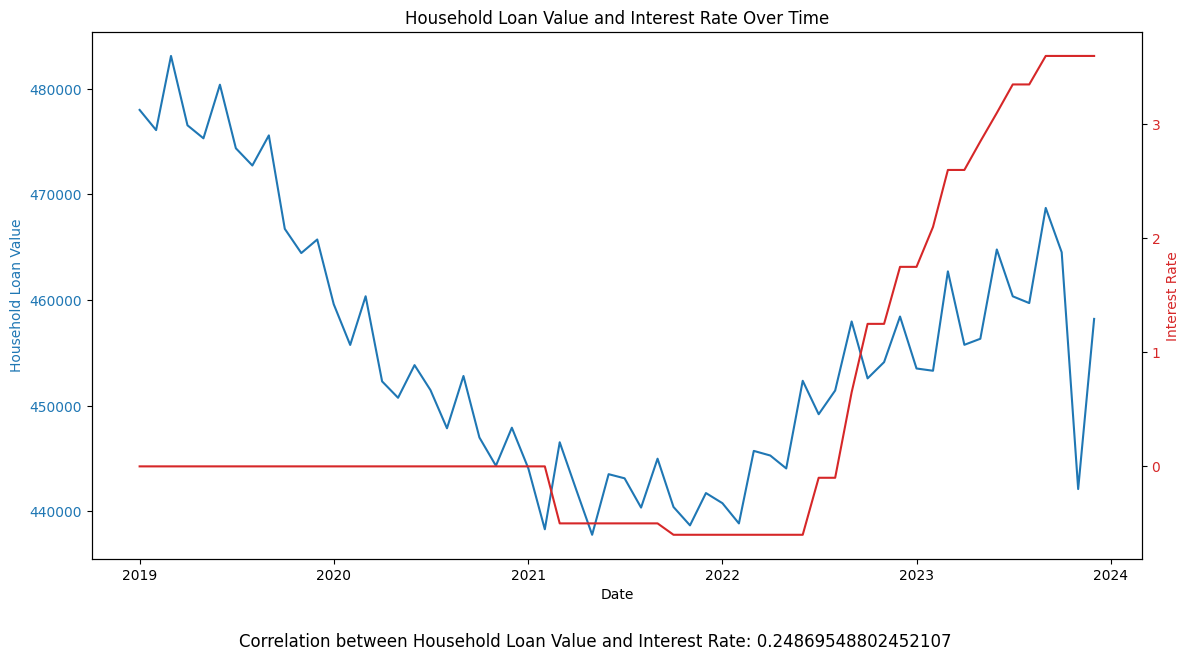

In [30]:
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Household Loan Value', color=color)
ax1.plot(merged_data['Date'], merged_data['Household_Loan_Value'], label='Household Loan Value', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Interest Rate', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_data['Date'], merged_data['Interest_Rate'], label='Interest Rate', color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Household Loan Value and Interest Rate Over Time')

# Adding correlation text
plt.figtext(0.5, -0.05, f'Correlation between Household Loan Value and Interest Rate: {correlation}', ha='center', fontsize=12)

plt.show()


5. Which type of loans were more preferred?


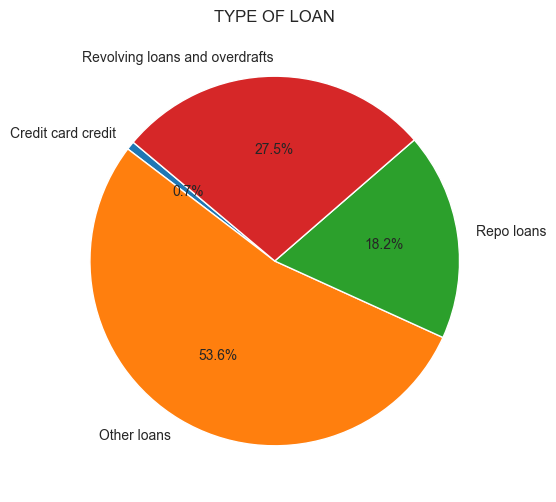

In [31]:
# Aggregating data for the visualizations
df['Type of Loans'] = df['Type of Loans'].str.replace('- ', '')
type_of_loan = df.groupby('Type of Loans')['value'].sum()

# Plotting the pie chart using seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.color_palette("pastel")
plt.pie(type_of_loan, labels=type_of_loan.index, autopct='%1.1f%%', startangle=140)

plt.title('TYPE OF LOAN')

plt.show()

6. What is the distribution of loan types by years?

<Figure size 1200x800 with 0 Axes>

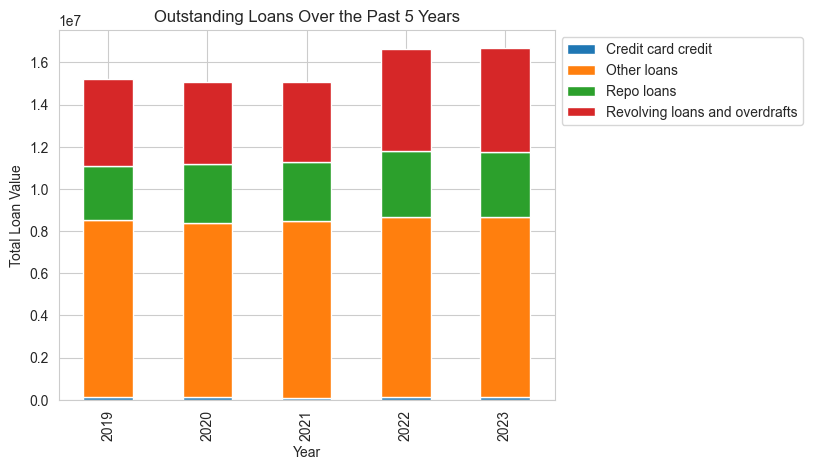

In [32]:
# Filter the dataset to include only the past 5 years
recent_years_df = df[df['Year'] >= df['Year'].max() - 4]

categories = recent_years_df['Type of Loans'].unique()

# Aggregate the loan values by year and category
category_trends = recent_years_df.groupby(['Year', 'Type of Loans'])['value'].sum().unstack()

# Plotting the changes in outstanding loans over the past 5 years
plt.figure(figsize=(12, 8))
category_trends.plot(kind='bar', stacked=True)
plt.title('Outstanding Loans Over the Past 5 Years')
plt.xlabel('Year')
plt.ylabel('Total Loan Value')
plt.legend(title='Type of Loans')
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


7. Which loan maturity period has the highest loan value?

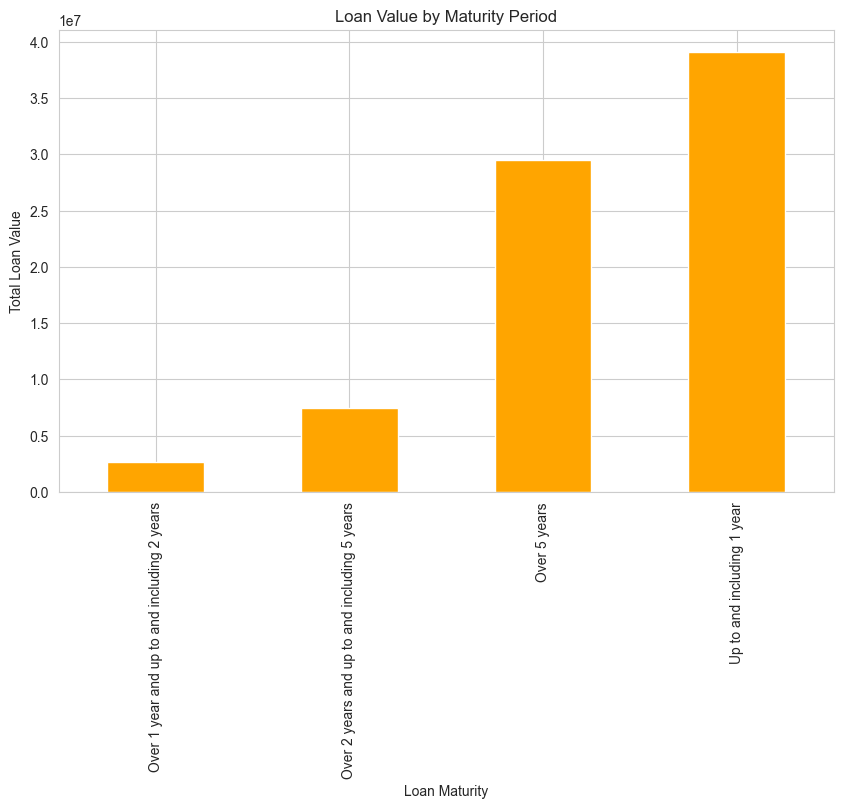

In [33]:
# Aggregating data for the visualizations
maturity_value = df.groupby('Loan Maturity')['value'].sum().sort_values()

# Plotting Loan Value by Maturity Period
plt.figure(figsize=(10, 6))
maturity_value.plot(kind='bar', color='orange')
plt.title('Loan Value by Maturity Period')
plt.xlabel('Loan Maturity')
plt.ylabel('Total Loan Value')
plt.grid(True)
plt.show()